In [72]:
#!pip install Riskfolio-Lib

In [73]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [74]:
# Date range
start = '2021-01-01'
end = '2022-04-30'

# Tickers of assets
assets = ['RELIANCE.NS', 'TCS.NS', 'CIPLA.NS', 'MARUTI.NS', 'ICICIBANK.NS', 'NESTLEIND.NS', 'RAMCOCEM.NS', 'HINDUNILVR.NS',
         'BANKBEES.NS','NIFTYBEES.NS']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
# Calculating returns
Y = data[assets].pct_change().dropna()
display(Y.head())

[*********************100%***********************]  10 of 10 completed


,BANKBEES.NS,CIPLA.NS,HINDUNILVR.NS,ICICIBANK.NS,MARUTI.NS,NESTLEIND.NS,NIFTYBEES.NS,RAMCOCEM.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2021-01-04,0.1498%,0.6835%,1.6314%,0.7962%,0.1430%,-0.3943%,0.7622%,0.4214%,0.1686%,3.7975%
2021-01-05,1.4676%,-0.6008%,0.9911%,1.0438%,-0.6083%,0.9811%,0.3915%,-0.5574%,-1.2432%,1.7618%
2021-01-06,0.2949%,-0.2962%,-1.3568%,1.7590%,-0.3507%,-0.2317%,-0.0529%,1.0770%,-2.6372%,-1.3417%
2021-01-07,0.4411%,0.2122%,-2.0043%,-1.0243%,-0.8199%,-2.0953%,-0.0132%,3.7074%,-0.1619%,-0.6128%
2021-01-08,0.2305%,1.4700%,0.9435%,0.1756%,5.9324%,0.9872%,1.1111%,2.3612%,1.1799%,2.9049%


In [75]:
display(Y.tail())

,BANKBEES.NS,CIPLA.NS,HINDUNILVR.NS,ICICIBANK.NS,MARUTI.NS,NESTLEIND.NS,NIFTYBEES.NS,RAMCOCEM.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2022-04-25,0.0138%,-1.4323%,-1.2318%,0.6086%,0.0993%,-0.0718%,-1.1983%,-0.6848%,-2.3126%,-1.7813%
2022-04-26,0.7952%,2.6491%,2.2659%,0.2061%,-0.0708%,1.3263%,1.2238%,-1.3915%,2.9926%,-0.0535%
2022-04-27,-0.8709%,-0.0664%,-0.1513%,-2.2620%,-1.4968%,-1.0467%,-0.7146%,-1.8080%,0.0973%,0.4202%
2022-04-28,1.0052%,0.3529%,4.5103%,1.4185%,1.2808%,1.1233%,0.8821%,1.8092%,1.4937%,0.6487%
2022-04-29,-0.8016%,0.0000%,-0.3122%,-0.5153%,-2.1596%,-0.5285%,-0.5257%,0.1575%,-1.0497%,-1.0490%


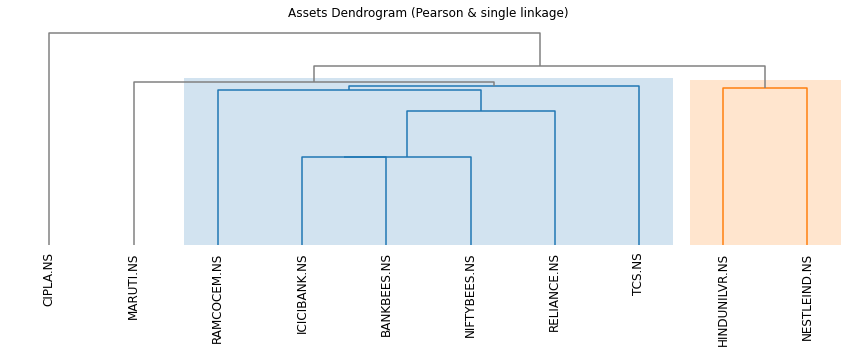

In [76]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

In [77]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,BANKBEES.NS,CIPLA.NS,HINDUNILVR.NS,ICICIBANK.NS,MARUTI.NS,NESTLEIND.NS,NIFTYBEES.NS,RAMCOCEM.NS,RELIANCE.NS,TCS.NS
weights,6.1286%,13.7442%,7.9128%,3.6020%,9.8581%,11.4691%,21.0181%,6.5082%,7.2148%,12.5442%


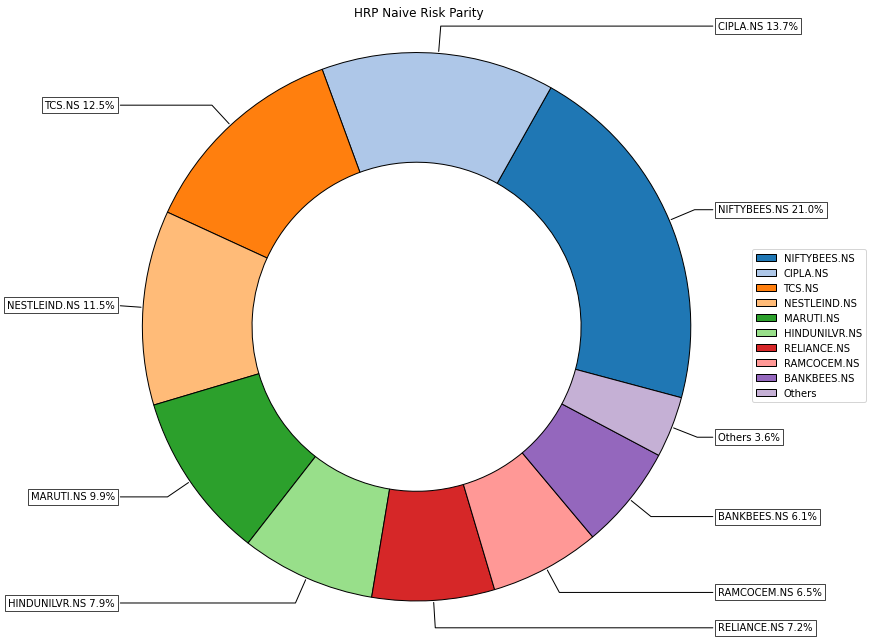

In [78]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.06,
                 nrow=25,
                 cmap="tab20",
                 height=9,
                 width=11.5,
                 ax=None)

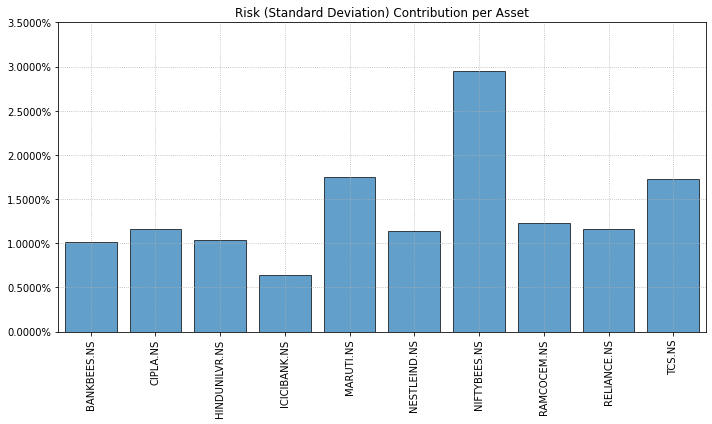

In [79]:
mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

In [80]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence='pearson',
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,FLPM,SLPM,CVaR,WR,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel
BANKBEES.NS,6.29%,6.13%,6.91%,6.39%,5.44%,4.77%,5.66%,5.79%,6.34%,6.37%,6.02%,5.94%,5.63%,5.72%,6.17%
CIPLA.NS,13.34%,13.74%,13.20%,13.47%,14.36%,15.20%,21.20%,20.55%,21.11%,21.18%,21.15%,21.06%,20.16%,20.49%,20.59%
HINDUNILVR.NS,7.29%,7.91%,6.75%,7.31%,7.84%,10.14%,3.52%,3.28%,2.92%,2.93%,3.20%,3.20%,3.81%,3.51%,3.12%
ICICIBANK.NS,4.82%,3.60%,5.53%,5.35%,4.84%,4.98%,5.00%,5.90%,6.03%,5.84%,5.41%,5.74%,5.00%,5.81%,5.84%
MARUTI.NS,11.30%,9.86%,11.18%,10.82%,10.48%,10.23%,10.29%,8.49%,10.04%,10.33%,10.38%,9.38%,10.67%,8.67%,10.33%
NESTLEIND.NS,8.78%,11.47%,8.00%,9.04%,10.77%,12.40%,6.93%,5.44%,5.91%,6.05%,6.54%,5.88%,6.79%,5.38%,5.86%
NIFTYBEES.NS,16.34%,21.02%,16.64%,15.87%,15.02%,13.57%,15.49%,22.18%,18.56%,16.91%,16.18%,20.04%,15.59%,21.71%,18.34%
RAMCOCEM.NS,9.24%,6.51%,9.19%,9.09%,8.40%,8.28%,5.37%,6.53%,5.12%,5.44%,5.44%,6.14%,5.88%,6.82%,5.47%
RELIANCE.NS,9.58%,7.21%,9.68%,9.85%,10.04%,9.26%,11.52%,9.68%,10.40%,10.77%,10.91%,9.91%,11.46%,9.63%,10.66%
TCS.NS,13.02%,12.54%,12.93%,12.81%,12.80%,11.18%,15.02%,12.16%,13.56%,14.18%,14.79%,12.70%,15.01%,12.26%,13.61%


<AxesSubplot:>

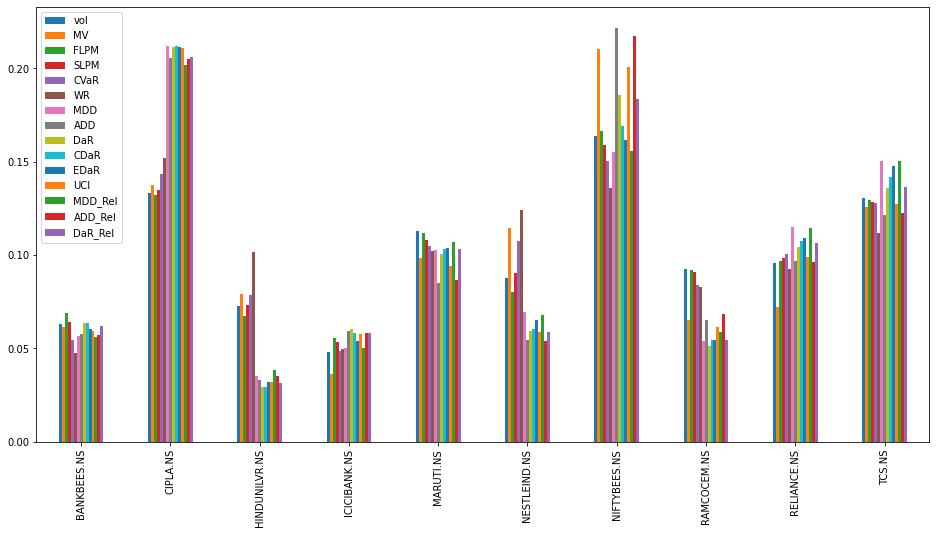

In [81]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(8)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)